In [1]:
# !pip install uavsar_pytools

## Creating a Netrc file

In [ ]:
from uavsar_pytools.uavsar_tools import create_netrc
create_netrc()

## Basic Usage: You have a url and want to download, unzip, and convert to geotiffs.

In [13]:
from uavsar_pytools.UavsarScene import UavsarScene
directory_to_load = '~/Downloads/uavsar_ex/'
url = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/ylwstn_26902_09053-000_14110-001_1838d_s01_L090_01_int_grd.zip'
scene = UavsarScene(url = url, work_dir = directory_to_load)
scene.url_to_tiffs()

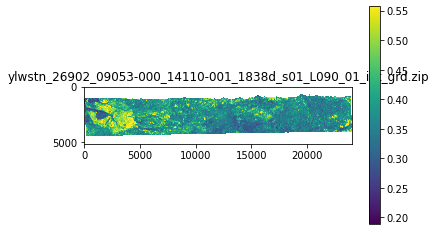

In [39]:
scene.show(2)

In [38]:
import pandas as pd
pd.DataFrame(scene.images[0]['description'])

,uavsar rpi annotation file version number,site description,flight plan comments of pass 1,flight plan comments of pass 2,processing comments,url,slant range interferogram,slant range unwrapped phase,slant range correlation,slant range amplitude of pass 1,slant range amplitude of pass 2,ground range interferogram,ground range unwrapped phase,ground range correlation,ground range amplitude of pass 1,ground range amplitude of pass 2,dem used in ground projection,kmz of ground range interferogram,kmz of ground range unwrapped phase,kmz of ground range correlation,kmz of ground range amplitude of pass 1,kmz of ground range amplitude of pass 2,kmz of dem used in ground projection,single look complex data of pass 1,single look complex data of pass 2,slant range data azimuth lines,slant range data range samples,slant range data starting azimuth,slant range data at near range,slant range data azimuth spacing,slant range data range spacing,number of looks in range,number of looks in azimuth,ground range data latitude lines,ground range data longitude samples,ground range data starting latitude,ground range data starting longitude,ground range data latitude spacing,ground range data longitude spacing,approximate upper left latitude,...,grd_mag.val_size,grd_phs.val_size,slc_mag.val_size,slc_phs.val_size,val_endi,slt.val_frmt,slt_mag.val_frmt,slt_phs.val_frmt,grd.val_frmt,grd_mag.val_frmt,grd_phs.val_frmt,slc_mag.val_frmt,slc_phs.val_frmt,slt.set_proj,slt_mag.set_proj,slt_phs.set_proj,grd.set_proj,grd_mag.set_proj,grd_phs.set_proj,slc_mag.set_proj,slc_phs.set_proj,val_mult,val_addr,val_minv,val_maxv,slt_phs.val_mult,slt_phs.val_minv,slt_phs.val_maxv,grd_phs.val_mult,grd_phs.val_minv,grd_phs.val_maxv,slc_phs.val_mult,slc_phs.val_minv,slc_phs.val_maxv,dsp_cmap,slt_phs.dsp_cmap,grd_phs.dsp_cmap,slc_phs.dsp_cmap,set_hddr,set_tail
value,2,"Yellowstone National Park, WY",N/A,N/A,N/A,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,14601,3206,-54352.5,10921.520914,7.2,4.996541,3,12,5110,24007,44.858922,-111.236787,-0.000056,0.000056,44.804521,...,8,8,8,8,LITTLE ENDIAN,REAL*4,COMPLEX_MAGNITUDE,COMPLEX_PHASE,REAL*4,COMPLEX_MAGNITUDE,COMPLEX_PHASE,COMPLEX_MAGNITUDE,COMPLEX_PHASE,SCX,SCX,SCX,EQA,EQA,EQA,SCX,SCX,1.0,0.0,-1000000.0,10000000.0,1.0,-3.14,3.14,1.0,-3.14,3.14,1.0,-3.14,3.14,grey,cmy,cmy,cmy,0,0
units,-,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,-,-,m,m,m,m,-,-,-,-,deg,deg,deg,deg,deg,...,bytes,bytes,bytes,bytes,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,&,-,-,dB,dB,-,rad,rad,-,rad,rad,-,rad,rad,&,&,&,&,bytes,bytes
comment,uavsar rpi annotation file version number ...,site description ...,flight plan comments of pass 1 ...,flight plan comments of pass 2 ...,processing comments ...,url ...,file size 374486448 bytes,file size 187243224 bytes,file size 187243224 bytes,file size 187243224 bytes,file size 187243224 bytes,file size 981406160 bytes,file size 490703080 bytes,file size 490703080 bytes,file size 490703080 bytes,file size 490703080 bytes,file size 490703080 bytes,file size 213807141 bytes,file size 75894124

In [35]:
print(scene.images[0]['description']['start time of acquisition for pass 1']['value'])
print(scene.images[0]['description']['start time of acquisition for pass 2']['value'])

31-Jul-2009 19:52:54 UTC
12-Aug-2014 20:04:09 UTC


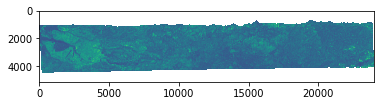

In [28]:
import matplotlib.pyplot as plt
plt.imshow(scene.images[0]['array'].astype(float))

## You have a single image (usually an incidence angle file and want to convert)

In [41]:
from uavsar_pytools.UavsarImage import UavsarImage
inc_url = 'http://uavsar.asfdaac.alaska.edu/UA_lowman_23205_21021_006_210322_L090_CX_01/lowman_23205_21021_006_210322_L090_CX_01.inc'
directory_to_load = '~/Downloads/uavsar_ex/jpl_img'
img = UavsarImage(url = inc_url, work_dir = directory_to_load)
img.url_to_tiff()

OSError: [Errno 28] No space left on device

## You want to define and search programmatically

In [ ]:
# show map
m = Map()
draw = Draw(export = True, filename = 'asf_wkt.geojson')
draw.add_to(m)
m

In [ ]:
import geopandas as gpd
wkt = 'POLYGON((-135.6 58.2 -136.6 58.1 -135.8 56.9 -134.6 56.9 -134.9 58.0 -135.7 58.2))'
wkt = gpd.read_file('~/Downloads/asf_wkt.geojson').to_wkt().loc[0, 'geometry']
print(wkt)

In [ ]:
# define search parameters for sierra flight line
start_date = datetime.strptime('2019-02-20 11:00:00', '%Y-%m-%d %H:%M:%S') 
end_date = datetime.strptime('2022-02-21 11:00:00', '%Y-%m-%d %H:%M:%S') 

# search for data
results = asf.search(platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     intersectsWith = sagehen_wkt,
                     start = start_date,
                     end = end_date)

print(f'{len(results)} product(s) found')

In [ ]:
for i in range(len(results)):
    url = results[i].properties['url']
    #print(url)
    scene = UavsarScene(url = url, work_dir= './data/imgs/')
    scene.url_to_tiffs()